In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep

In [44]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
SSTdate='2022-10-2'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') and (f[:13]=='SST_'+SSTdate) and (f[13] in ['1','2','3'])]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)
#tmin=int(files[0][18:18+2])
#tsec=int(files[0][21:21+2])
#print(tmin,tsec)
tsec=int(files[0][18:18+2])*60+int(files[0][21:21+2])
print("time offset %is"%tsec)

72 SST_2022-10-21-00-53-49.npy
0 SST_2022-10-21-00-53-49.npy
1 SST_2022-10-21-01-53-49.npy
2 SST_2022-10-21-02-53-49.npy
3 SST_2022-10-21-03-53-49.npy
4 SST_2022-10-21-04-53-49.npy
5 SST_2022-10-21-05-53-49.npy
6 SST_2022-10-21-06-53-49.npy
7 SST_2022-10-21-07-53-49.npy
8 SST_2022-10-21-08-53-49.npy
9 SST_2022-10-21-09-53-49.npy
10 SST_2022-10-21-10-53-49.npy
11 SST_2022-10-21-11-53-49.npy
12 SST_2022-10-21-12-53-49.npy
13 SST_2022-10-21-13-53-49.npy
14 SST_2022-10-21-14-53-49.npy
15 SST_2022-10-21-15-53-49.npy
16 SST_2022-10-21-16-53-49.npy
17 SST_2022-10-21-17-53-49.npy
18 SST_2022-10-21-18-53-49.npy
19 SST_2022-10-21-19-53-49.npy
20 SST_2022-10-21-20-53-49.npy
21 SST_2022-10-21-21-53-49.npy
22 SST_2022-10-21-22-53-49.npy
23 SST_2022-10-21-23-53-49.npy
24 SST_2022-10-22-00-53-49.npy
25 SST_2022-10-22-01-53-49.npy
26 SST_2022-10-22-02-53-49.npy
27 SST_2022-10-22-03-53-49.npy
28 SST_2022-10-22-04-53-49.npy
29 SST_2022-10-22-05-53-49.npy
30 SST_2022-10-22-06-53-49.npy
31 SST_2022-10-22-

In [45]:
freqs=np.arange(512)/512*100
freq1=50;i1=np.argmin(np.abs(freqs-freq1))
freq2=70;i1=np.argmin(np.abs(freqs-freq2))
#print(i2,i1,freqs[i1],freqs[i2])

In [46]:

D=[]
flist=[]
for f in files[:]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,:18,:]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//600,600,ns[1],ns[2])
  D2=np.percentile(D2,50,axis=1)
  D.append(D2)
  flist.append(f)
  print("    ",D[-1].shape)
D=np.array(D)
print(D.shape)
ns=D.shape
D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D.shape)


SST_2022-10-21-00-53-49.npy
     (6, 18, 512)
SST_2022-10-21-01-53-49.npy
     (6, 18, 512)
SST_2022-10-21-02-53-49.npy
     (6, 18, 512)
SST_2022-10-21-03-53-49.npy
     (6, 18, 512)
SST_2022-10-21-04-53-49.npy
     (6, 18, 512)
SST_2022-10-21-05-53-49.npy
     (6, 18, 512)
SST_2022-10-21-06-53-49.npy
     (6, 18, 512)
SST_2022-10-21-07-53-49.npy
     (6, 18, 512)
SST_2022-10-21-08-53-49.npy
     (6, 18, 512)
SST_2022-10-21-09-53-49.npy
     (6, 18, 512)
SST_2022-10-21-10-53-49.npy
     (6, 18, 512)
SST_2022-10-21-11-53-49.npy
     (6, 18, 512)
SST_2022-10-21-12-53-49.npy
     (6, 18, 512)
SST_2022-10-21-13-53-49.npy
     (6, 18, 512)
SST_2022-10-21-14-53-49.npy
     (6, 18, 512)
SST_2022-10-21-15-53-49.npy
     (6, 18, 512)
SST_2022-10-21-16-53-49.npy
     (6, 18, 512)
SST_2022-10-21-17-53-49.npy
     (6, 18, 512)
SST_2022-10-21-18-53-49.npy
     (6, 18, 512)
SST_2022-10-21-19-53-49.npy
     (6, 18, 512)
SST_2022-10-21-20-53-49.npy
     (6, 18, 512)
SST_2022-10-21-21-53-49.npy
     (

In [57]:
sky=np.load("../L2TS_cal/Sky70.npy")
skyhour=np.arange(24*3*6)/6
print(sky.shape)

(9, 2, 432)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


istart= 0 0.0
323 1.0171658143384121 3401 9.447222222222223


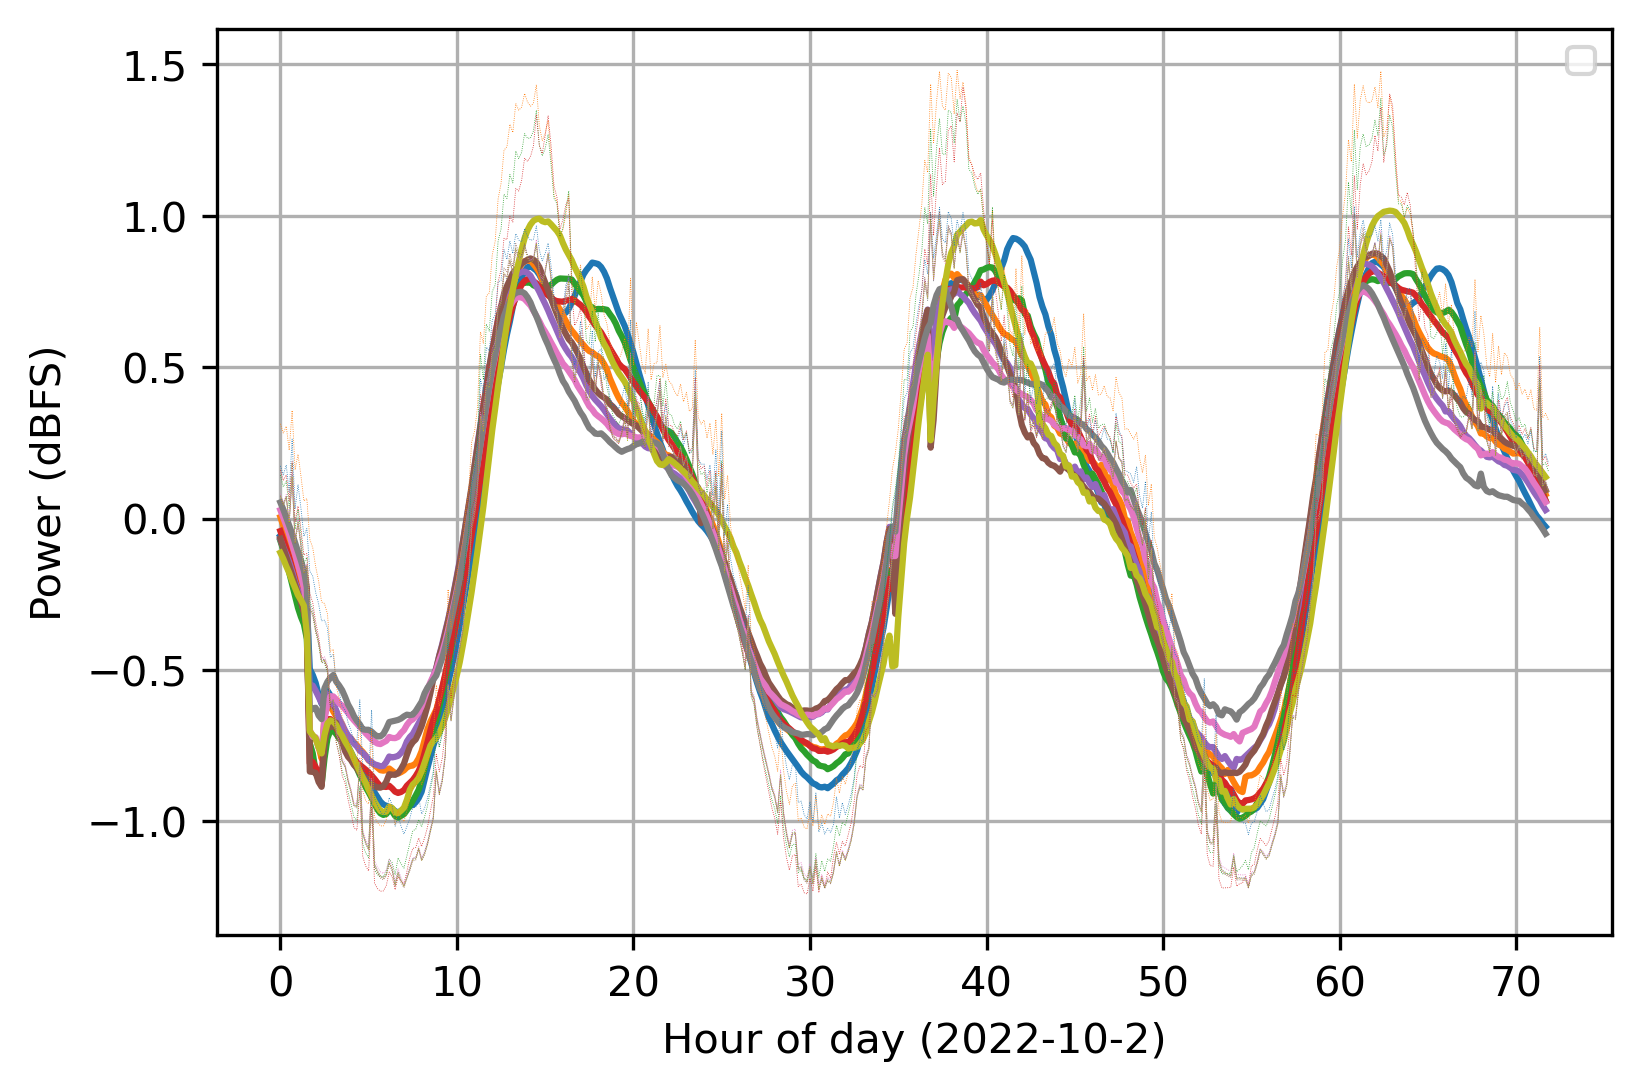

In [65]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for i in [i2]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    plt.plot(hour_of_day[istart:istop],Pwr);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
plt.gca().set_prop_cycle(None)
skyP=10*np.log10(sky[:,0])
skyP-=np.mean(skyP)
plt.plot(skyhour,skyP.T,':',linewidth=0.2)
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


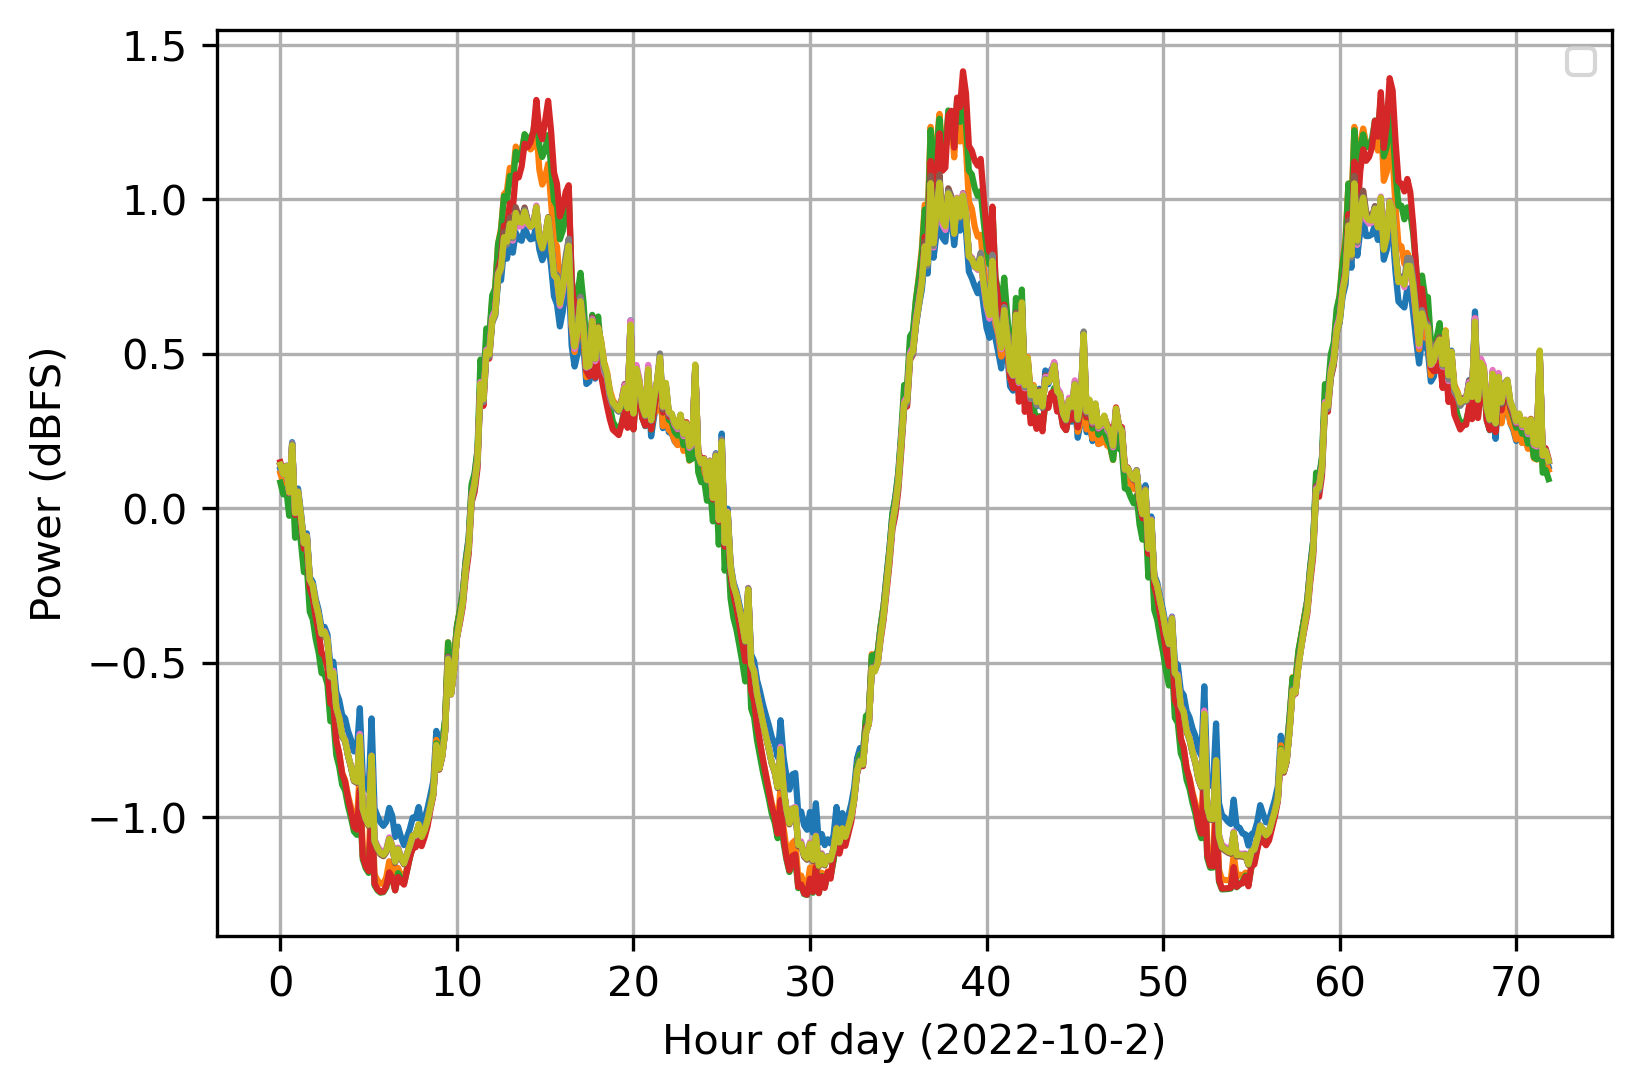

In [70]:
plt.figure(dpi=300)
skyP=10*np.log10(sky[:,0])
skyP-=np.mean(skyP,axis=1)[:,np.newaxis]
plt.plot(skyhour,skyP.T,'-')
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


323 1.4978412238909158 2176 6.044444444444444


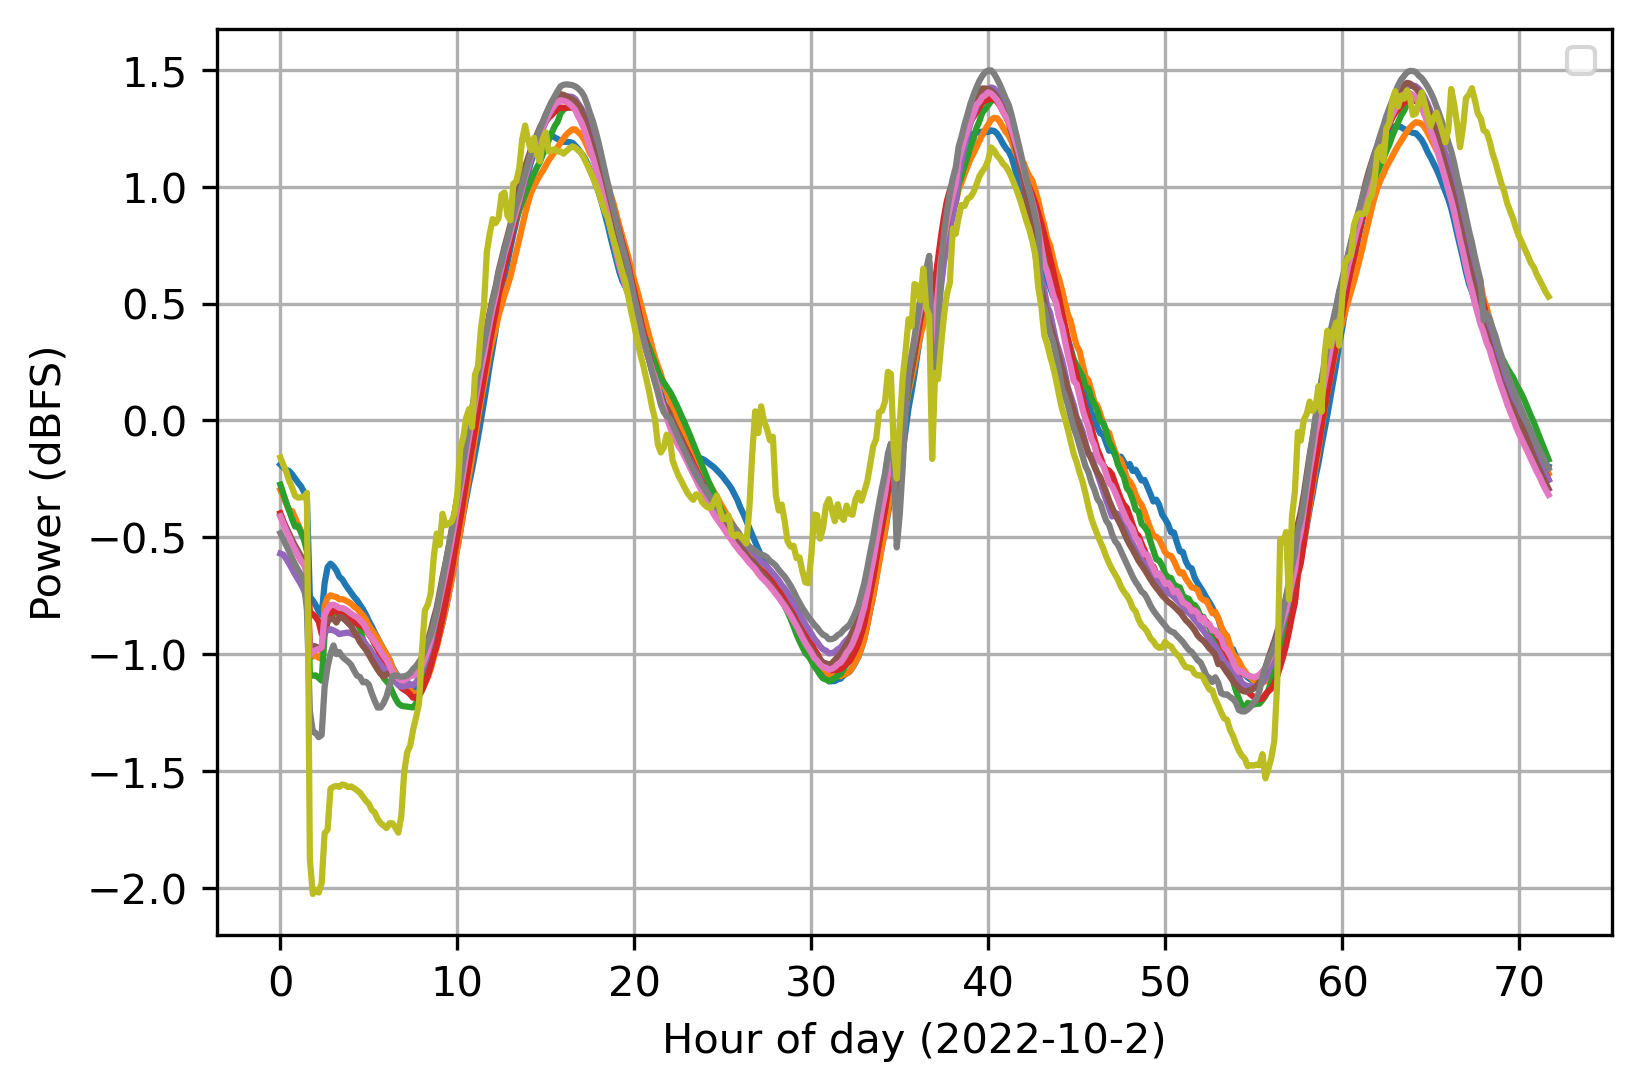

In [71]:
plt.figure(dpi=300)
for i in [i2]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    plt.plot(hour_of_day[istart:istop],Pwr);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
##skyP=10*np.log10(sky[1])
##skyP-=np.mean(skyP)
#plt.plot(skyhour-2,skyP,'k-')

plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


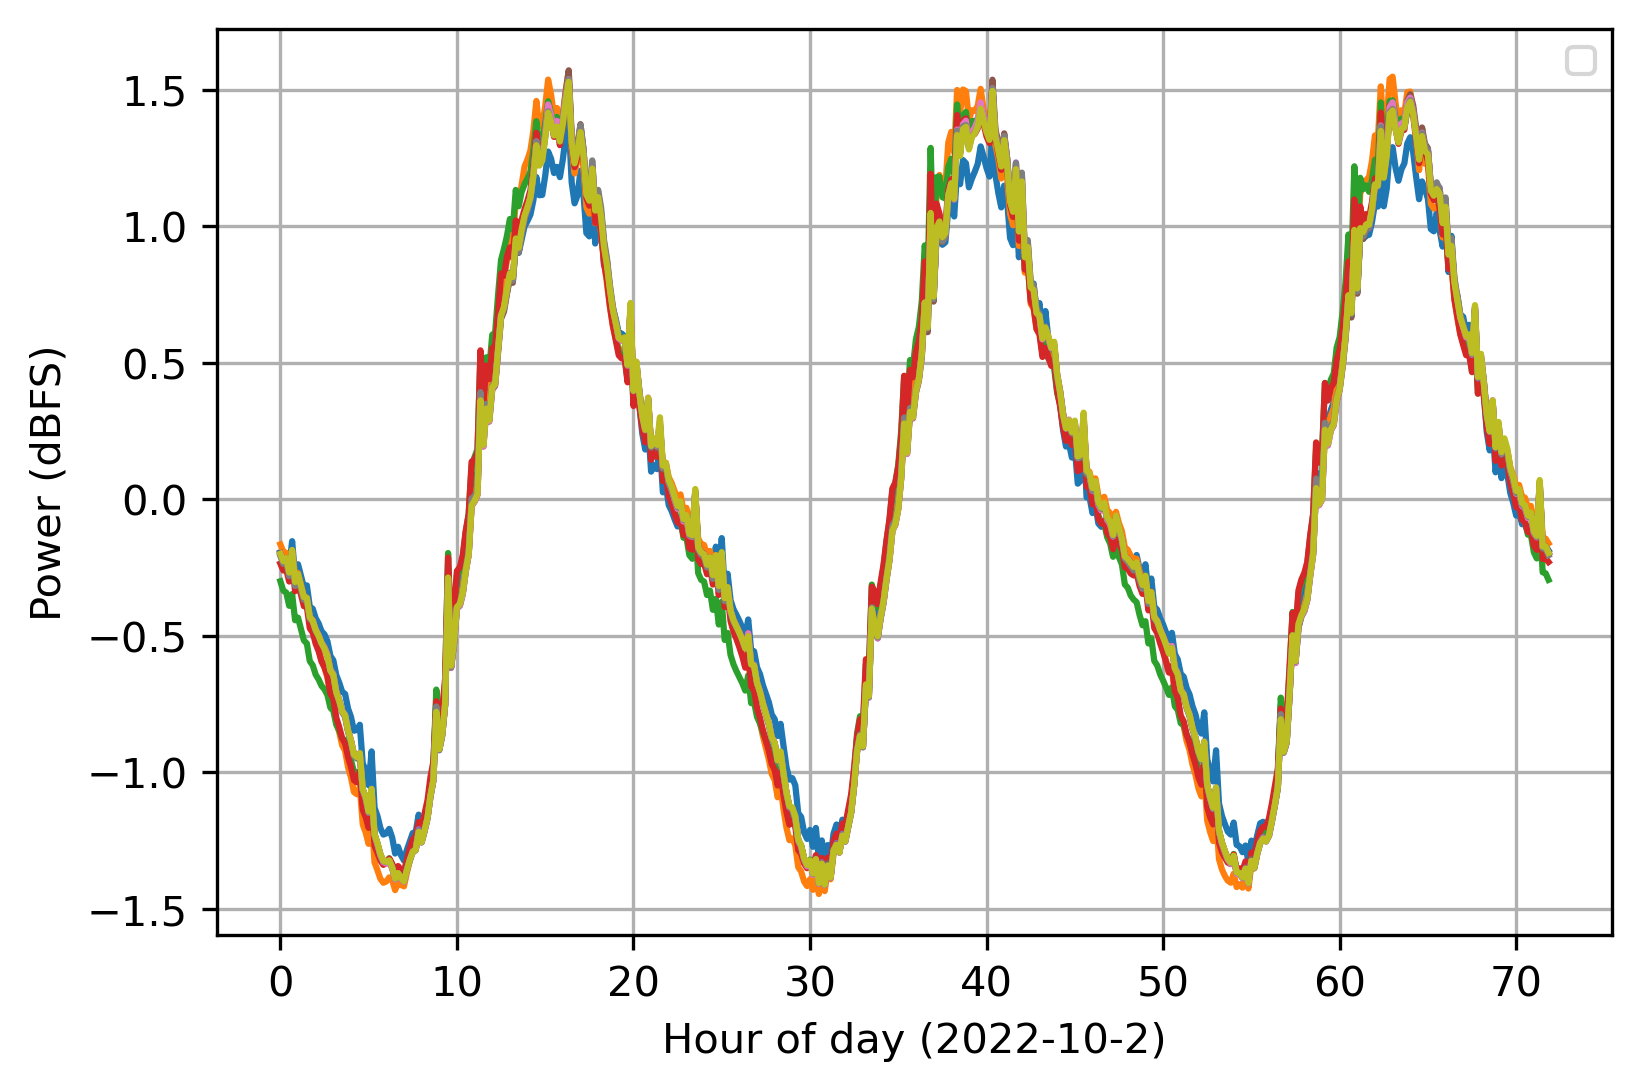

In [72]:
plt.figure(dpi=300)
skyP=10*np.log10(sky[:,1])
skyP-=np.mean(skyP,axis=1)[:,np.newaxis]
plt.plot(skyhour,skyP.T,'-')
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()